### Shap Value 실습
- 연합 게임 이론의 Shapley value에서 얻어온 개념
- Goal을 성취하기 위해 player들이 협업
- Goal - prediction, Player - Feature, Payout - Feature Attribution

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'c:\\Users\\lee45\\Desktop\\프로젝트\\인공지능\\ML\\Ensemble'

In [3]:
data = pd.read_csv("./data/kc_house_data.csv") 
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,3,8,1987,0,98074,47.6168,-122.045


In [4]:
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1)

In [5]:
feature_columns = list(data.columns.difference(['price']))
X = data[feature_columns]
y = data['price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_error

In [7]:
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees, 트리 생성 개수
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 8
[LightGBM] [Info] Start training from score 537729.263666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [8]:
import shap

In [9]:
explainer = shap.TreeExplainer(lgb_model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(test_x)

In [10]:
shap.initjs() # 자바스크립트 초기화(그래프 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1, :]) # 첫 번쨰 검증 데이터 인스턴스에 대해 Shap Value 적용

In [11]:
test_x.head()

,bathrooms,bedrooms,condition,floors,grade,waterfront,yr_built,yr_renovated
735,2.25,4,4,2.0,8,0,1986,0
2830,3.00,5,5,1.0,8,0,1977,0
4106,2.50,4,3,2.0,11,0,1997,0
16218,3.50,3,3,2.0,12,0,1990,0
19964,2.50,3,3,2.0,9,0,2004,0


In [13]:
# shap.force_plot(explainer.expected_value, shap_values, test_x) 
# # 전체 검증 데이터 셋에 대해서 적용(시간 관계로 일단 스킵)

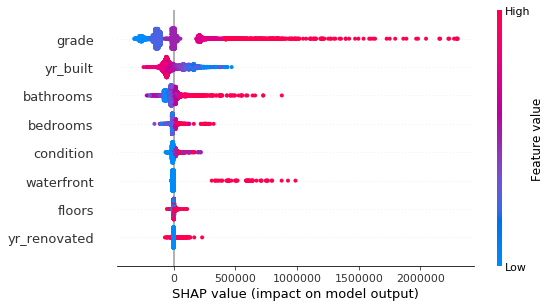

In [14]:
shap.summary_plot(shap_values, test_x)

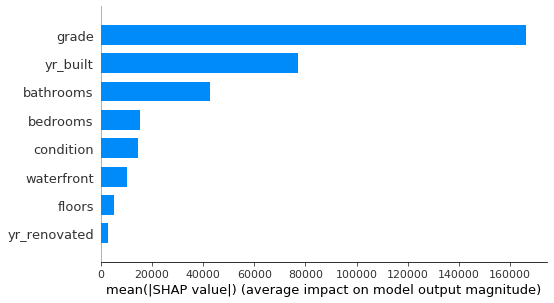

In [15]:
shap.summary_plot(shap_values, test_x, plot_type = "bar")

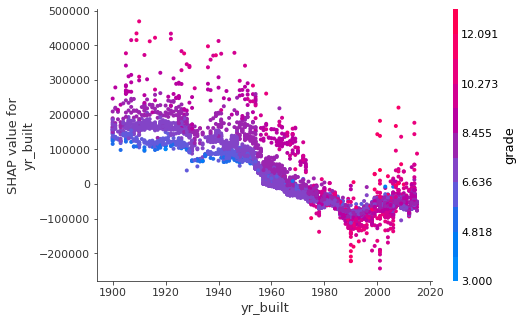

In [16]:
shap.dependence_plot("yr_built", shap_values, test_x)

[추가적으로 Shap에 대한 정보 깃허브 링크](https://github.com/slundberg/shap)